In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


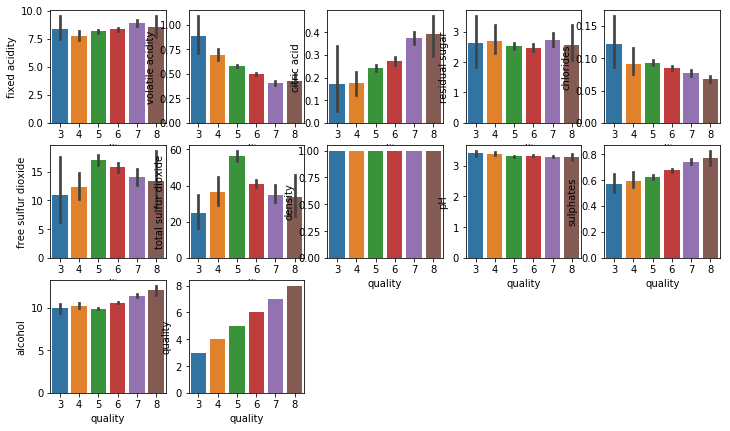

In [6]:
plt.figure(figsize = (12,12))
for i,column in enumerate(data):
    plt.subplot(5,5,i+1)
    sb.barplot(x='quality',y=column,data=data)

In [7]:
bins = (2,6.5,8)
group = ['good','bad']
data['quality']  = pd.cut(data['quality'],bins=bins,labels=group)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

labels = LabelEncoder()
data['quality'] = labels.fit_transform(data['quality'].astype(str))
data['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x = data.drop('quality',axis=1)
y = data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [22]:
clf.fit(x_train, y_train)

Iteration 1, loss = 1.23118013
Iteration 2, loss = 0.73814631
Iteration 3, loss = 0.47116580
Iteration 4, loss = 0.42172189
Iteration 5, loss = 0.40126573
Iteration 6, loss = 0.39361350
Iteration 7, loss = 0.39114801
Iteration 8, loss = 0.38626988
Iteration 9, loss = 0.38720320
Iteration 10, loss = 0.38362613
Iteration 11, loss = 0.38240873
Iteration 12, loss = 0.38143433
Iteration 13, loss = 0.38114092
Iteration 14, loss = 0.38125703
Iteration 15, loss = 0.38022588
Iteration 16, loss = 0.37930605
Iteration 17, loss = 0.37909645
Iteration 18, loss = 0.38020557
Iteration 19, loss = 0.37799591
Iteration 20, loss = 0.37646934
Iteration 21, loss = 0.37680444
Iteration 22, loss = 0.37688941
Iteration 23, loss = 0.37627445
Iteration 24, loss = 0.37586787
Iteration 25, loss = 0.37502433
Iteration 26, loss = 0.37450101
Iteration 27, loss = 0.37478391
Iteration 28, loss = 0.37402366
Iteration 29, loss = 0.37508840
Iteration 30, loss = 0.37410361
Iteration 31, loss = 0.37361617
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=21, shuffle=True, solver='sgd', tol=1e-09,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [25]:
accuracy_score(y_test, y_pred[:400])

0.835